# K-Means Clustering

El algoritmo KMeans agrupa los datos tratando de separar muestras en n grupos de igual varianza, minimizando un criterio conocido como inercia o suma de cuadrados dentro del grupo.

Algunas aplicaciones del mundo real de k-means:
- Segmentación de clientes
- Comprender lo que los visitantes de un sitio web están tratando de lograr
- Reconocimiento de patrones
- Aprendizaje automático
- Compresión de datos

In [3]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
%matplotlib inline

In [4]:
np.random.seed(0)

Hacer grupos aleatorios de puntos usando la clase make_blobs. La clase make_blobs puede aceptar muchas entradas, pero usaremos estas específicas.

* Input
     - n_samples: el número total de puntos divididos equitativamente entre clústeres.
         * El valor será: 5000
     - centros: El número de centros a generar, o las ubicaciones de los centros fijos.
         * El valor será: $[[4, 4], [-2, -1], [2, -3],[1,1]]$
     - cluster_std: La desviación estándar de los clusters.
         * El valor será: 0.9

* Output
     - X: Matriz de tmaaño $[nsamples, nfeatures]$. (Matriz de características)
         * Las muestras generadas.
     - y: Matriz de tamaño $[nsamples]$. (Vector de respuesta)
         * Las etiquetas de números enteros para la pertenencia al conglomerado de cada muestra.

In [5]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

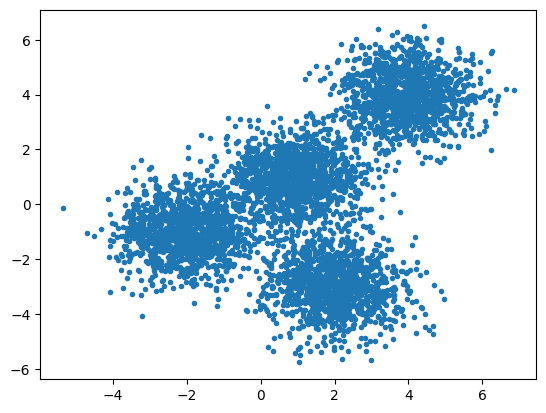

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [8]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [9]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [10]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centersk_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

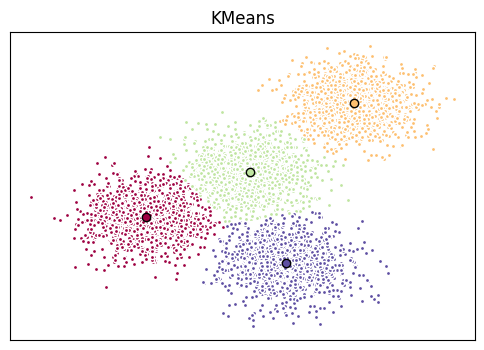

In [11]:
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

## Elbow method

El método Elbow es una técnica muy popular y la idea es ejecutar el agrupamiento de k-medias para un rango de grupos k (digamos de 1 a 10) y para cada valor, estamos calculando la suma de las distancias al cuadrado desde cada punto a su centro asignado (distorsiones).

Cuando se grafican las distorsiones y el gráfico parece un brazo, entonces el "codo" (el punto de inflexión en la curva) es el mejor valor de k.

In [13]:
import warnings
warnings.filterwarnings("ignore")
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

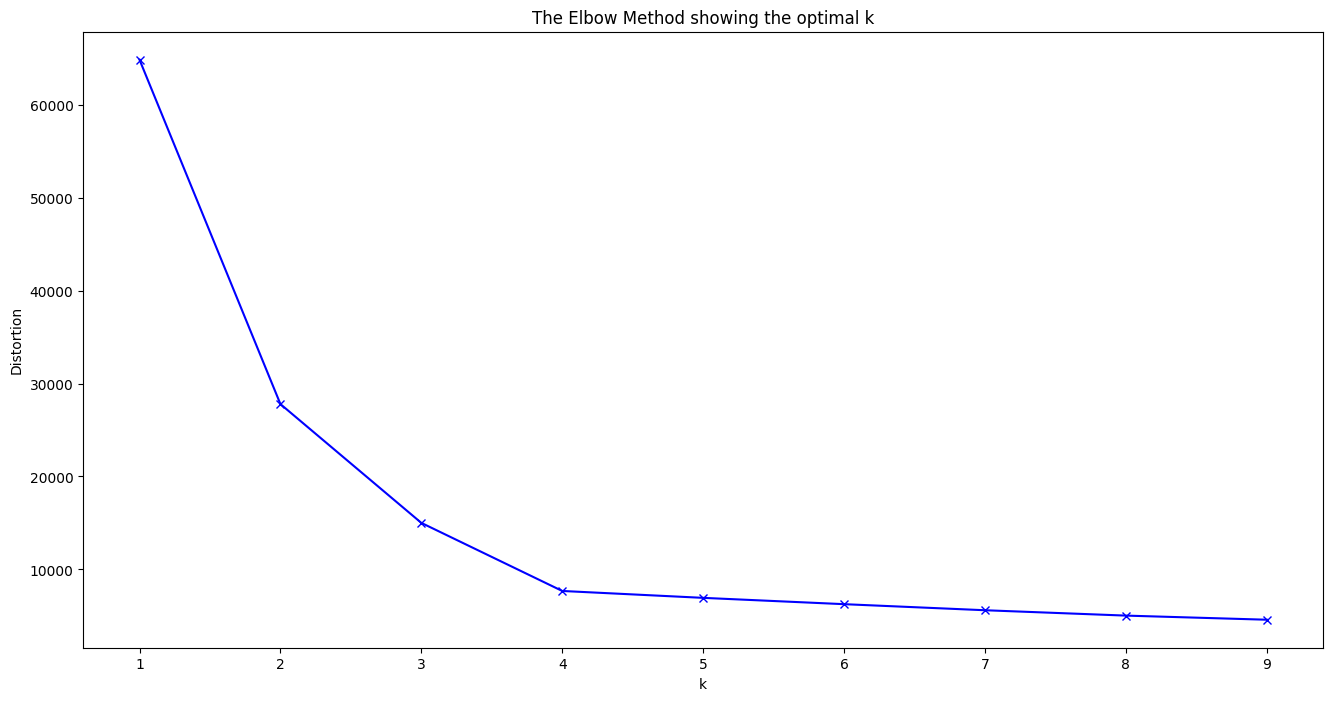

In [14]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
!pip install -q yellowbrick

### Using yellowbrick

[More info](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

El KElbowVisualizer implementa el método "codo" para ayudar a los científicos de datos a seleccionar la cantidad óptima de clústeres al ajustar el modelo con un rango de valores para 𝐾.

In [17]:
from yellowbrick.cluster import KElbowVisualizer

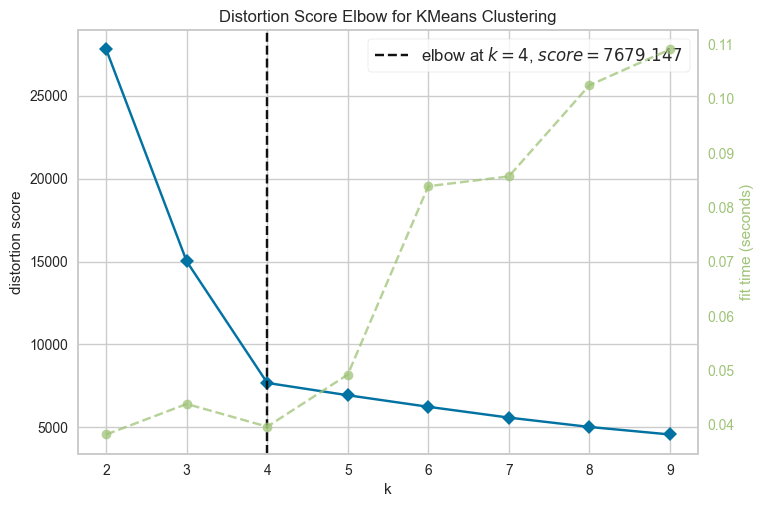

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

De forma predeterminada, la métrica del parámetro de puntuación se establece en distorsión, que calcula la suma de las distancias al cuadrado desde cada punto hasta su centro asignado. Sin embargo, también se pueden usar otras dos métricas con KElbowVisualizer: silueta y calinski_harabasz. La puntuación de silueta calcula el coeficiente de silueta medio de todas las muestras, mientras que la puntuación de calinski_harabasz calcula la relación de dispersión entre y dentro de los grupos.

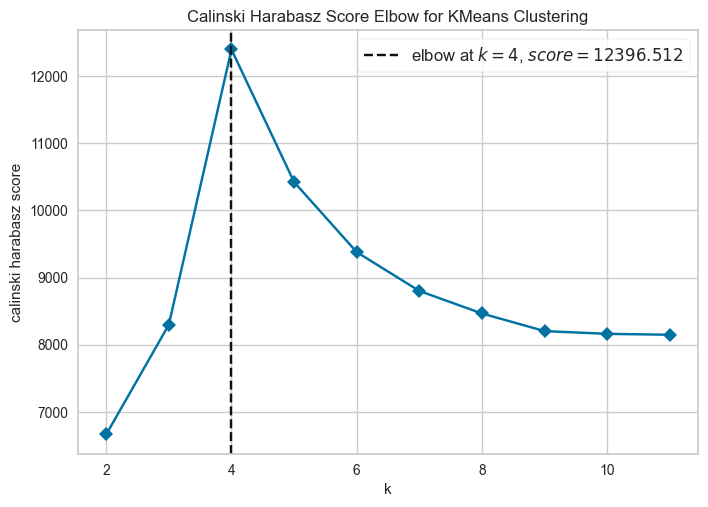

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [19]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Silhouette Method

El valor de la silueta mide qué tan similar es un punto a su propio grupo (cohesión) en comparación con otros grupos (separación).

El rango del valor de la silueta está entre +1 y -1. Un valor alto es deseable e indica que el punto está colocado en el clúster correcto. Si muchos puntos tienen un valor de silueta negativo, puede indicar que hemos creado demasiados o muy pocos grupos.


In [20]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

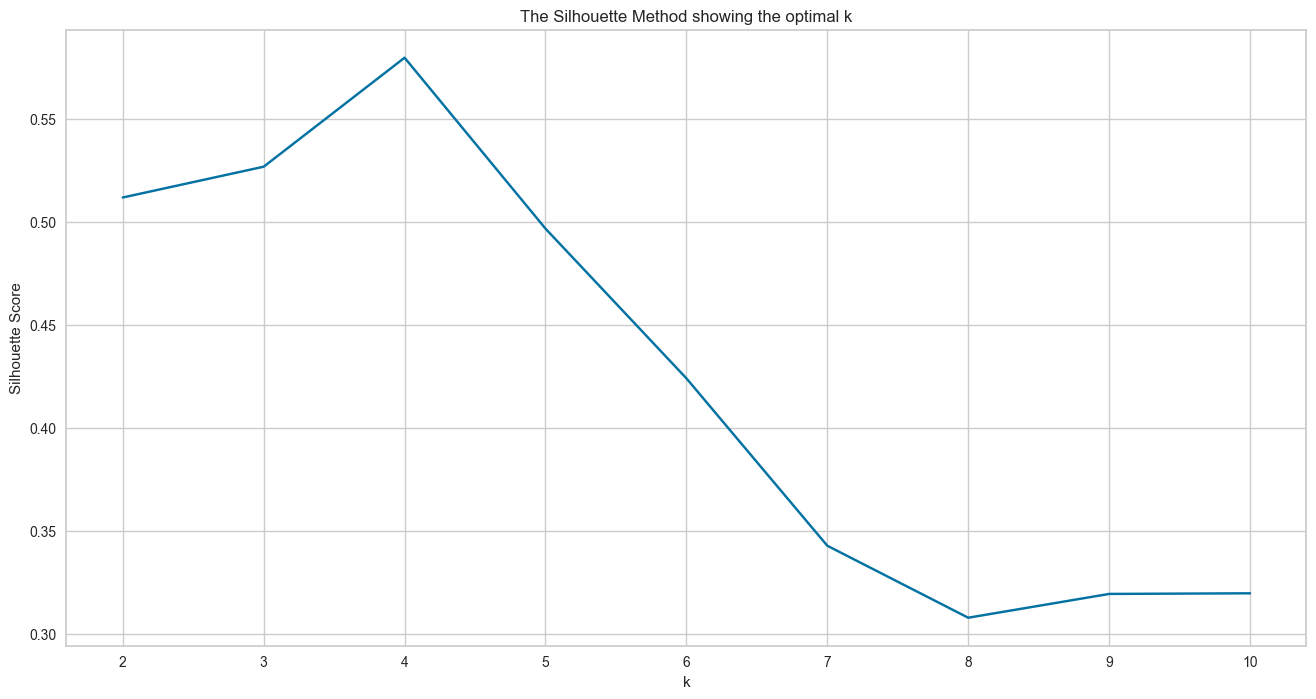

In [21]:
plt.figure(figsize=(16,8))
plt.plot(range(2, kmax+1), sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

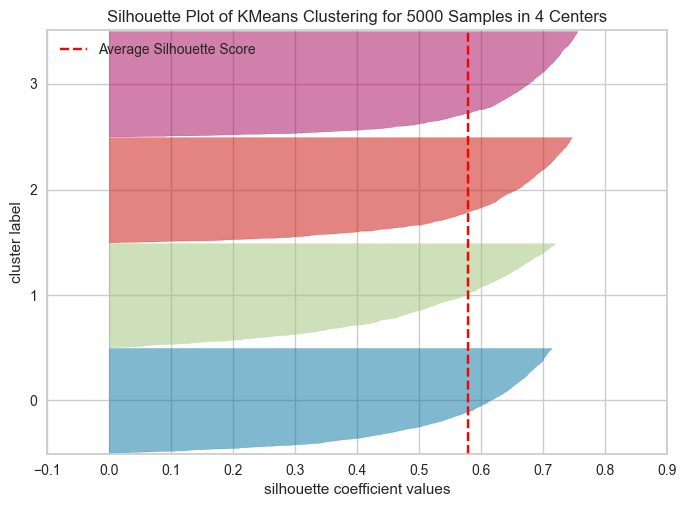

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Intercluster Distance Maps

Los mapas de distancia entre grupos muestran una incrustación de los centros de los grupos en 2 dimensiones conservando la distancia a otros centros. P.ej. cuanto más cerca estén de los centros en la visualización, más cerca estarán del espacio de características original. Los clústeres se dimensionan de acuerdo con una métrica de puntuación. De forma predeterminada, están dimensionados por membresía, p. el número de instancias que pertenecen a cada centro. Esto da una idea de la importancia relativa de los clústeres. Tenga en cuenta, sin embargo, que debido a que dos clústeres se superponen en el espacio 2D, no implica que se superpongan en el espacio de características original.


In [24]:
from yellowbrick.cluster import InterclusterDistance

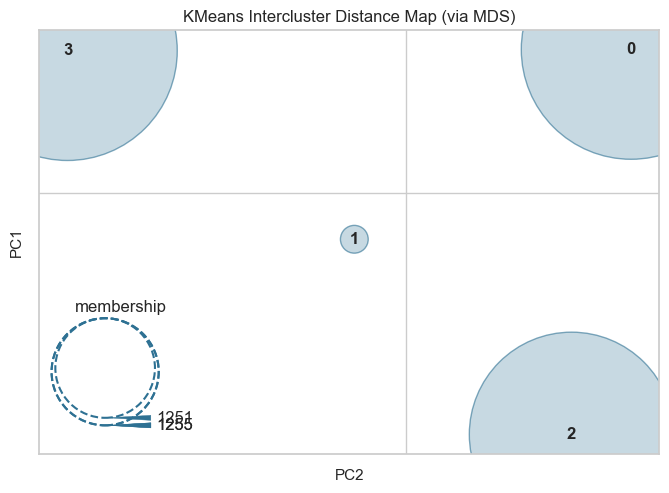

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [25]:
# Instantiate the clustering model and visualizer
model = KMeans(4)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

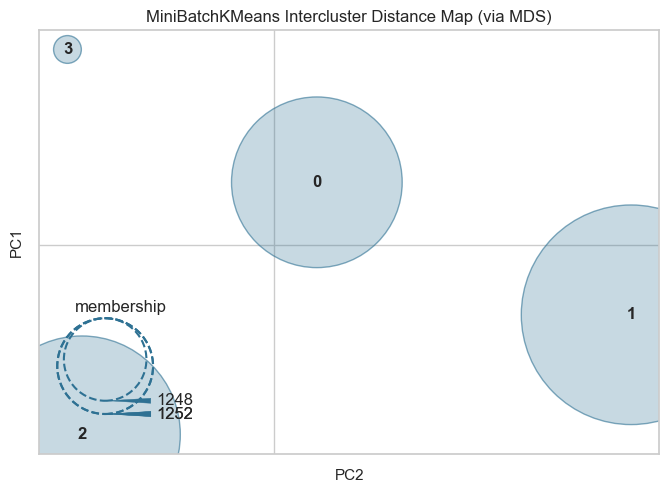

InterclusterDistance(ax=<Axes: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=4, random_state=0))

In [26]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import intercluster_distance

intercluster_distance(MiniBatchKMeans(4, random_state=0), X)

## Customer Segmentation con K-Means


In [27]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

In [28]:
df = cust_df.drop('Address', axis=1)
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

In [29]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [30]:
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSetX = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

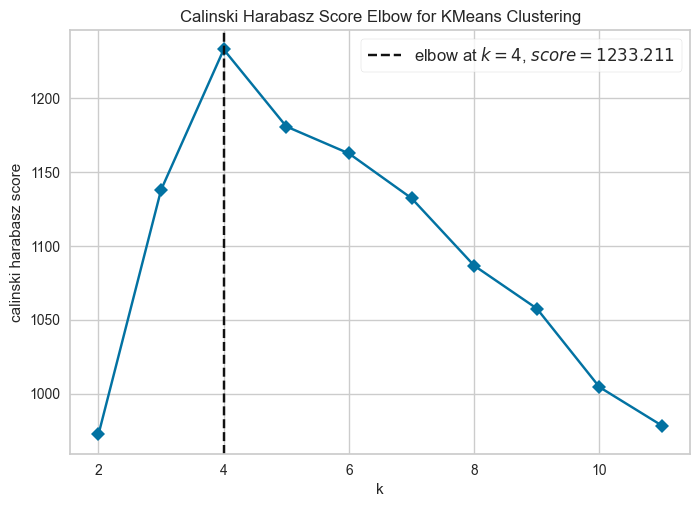

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [31]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figurevisualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

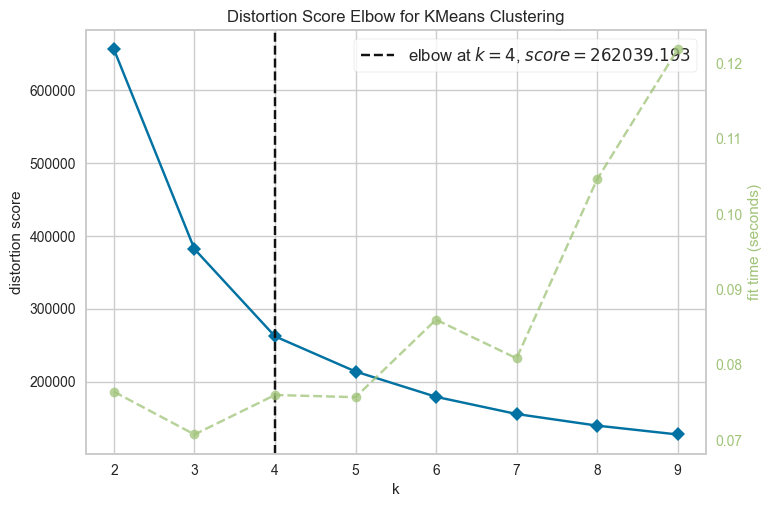

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [33]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 3 0 1 2 0 0 0 1 3 0 1 1 1 1 1 1 1 0 1 1 1 1 0 3 0 1 1 0 1 3 0 1 1 1 1 1
 1 1 3 1 3 1 3 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 3 1
 1 1 0 1 3 0 0 0 3 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 3 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 3 3 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 3 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 3 1 1 1 1 0 1 2 3 1 1 0 0 0 1 1 0 0 0 0 1 3
 1 1 1 1 3 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 3 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 3 3 1 3 1 0 1 3 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 3 0 0 3 1
 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 3 1 1 1 1 1 3 1 1 1 3 1 1 1 0 1 0 3 3 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 3 1 0 1 1 1 1 0 1 1 1 1 1 3 1 1 1 1 1 1 1 0 1
 0 3 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 2
 0 1 0 0 0 1 0 1 1 1 3 1 1 1 1 0 1 3 1 1 1 1 0 1 0 0 0 1 0 3 0 1 0 1 1 1 0
 1 0 1 1 1 1 3 1 1 1 0 1 

In [34]:
df["Clus_km"] = labels
df.head(5)

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Clus_km  
0        0.0              6.3        1  
1        0.0             12.8        3  
2        1.0             20.9        0  
3        0.0              6.3        1  
4        0.0              7.2        2

In [35]:
df.groupby('Clus_km').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         411.262443  39.764706  1.805430       12.923077   62.814480   
1         433.456172  32.050089  1.611807        5.445438   28.048301   
2         453.500000  46.600000  2.300000       21.200000  270.900000   
3         399.150000  43.416667  2.183333       19.483333  123.400000   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         2.312855    4.445878   0.203297        10.691855  
1         0.930440    1.896669   0.296774        10.122898  
2         7.884000   13.375200   0.428571         8.210000  
3         3.836667    7.340467   0.108696         9.036667

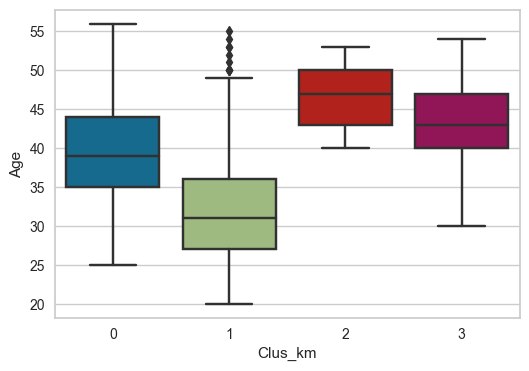

In [36]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(y='Age',x='Clus_km',data=df)
plt.show()

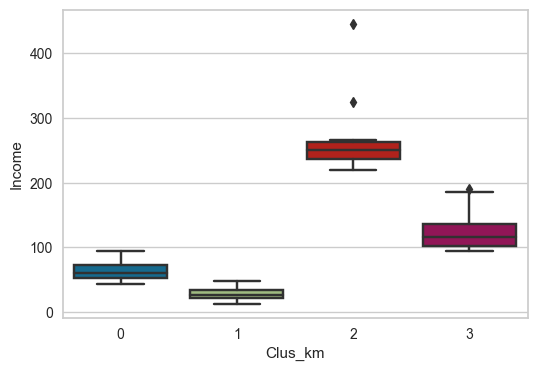

In [37]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Income',x='Clus_km',data=df)
plt.show()

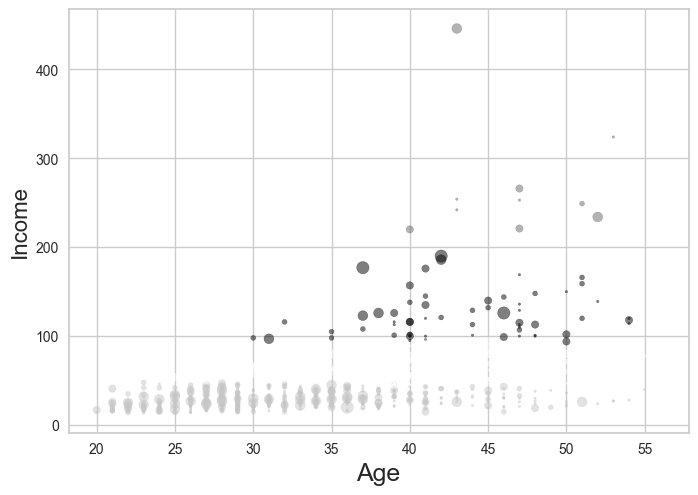

In [38]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

# Density-Based ClusteringDensity-Based Clustering

El DBSCAN localiza regiones de alta densidad que están separadas entre sí por regiones de baja densidad. La densidad, en este contexto, se define como el número de puntos dentro de un radio específico.

![](parametros.png)

![](dbscan.png)

In [42]:
import numpy as np 
from sklearn.cluster import DBSCAN 
#from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

**Data generation**

* centroidLocation: Coordenadas de los centroides que generarán los datos aleatorios.
     - Ejemplo: entrada: $[[4,3], [2,-1], [-1,4]]$
* numSamples: El número de puntos de datos que queremos generar, divididos entre el número de centroides (# de centroides definidos en centroidLocation)
     - Ejemplo: 1500
* clusterDeviation: La desviación estándar entre los clústeres. Cuanto mayor sea el número, mayor será el espaciado.
     - Ejemplo: 0.5

In [43]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [44]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

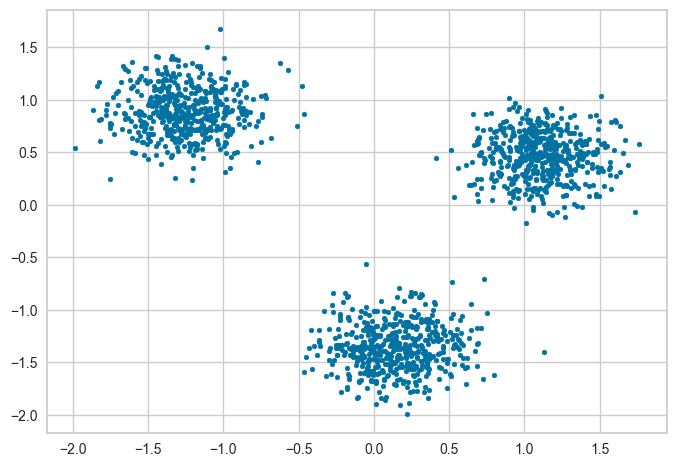

In [45]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_eps = [0.1,0.2,0.3,0.4,0.5]

for i in range_eps:
    print(f"eps es {i}")
    db = DBSCAN(eps=i, min_samples=7).fit(X)
    core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    silhouette_avg = silhouette_score(X,labels)
    print(f"Para eps = {i} ", labels, f"El promedio del Silhouette score es :{silhouette_avg}")

eps es 0.1
{0, 1, 2, 3, -1}
Para eps = 0.1  [0 1 0 ... 1 2 0] El promedio del Silhouette score es :0.5327722683441407
eps es 0.2
{0, 1, 2, -1}
Para eps = 0.2  [0 1 0 ... 1 2 0] El promedio del Silhouette score es :0.7568016696765594
eps es 0.3
{0, 1, 2, -1}
Para eps = 0.3  [0 1 0 ... 1 2 0] El promedio del Silhouette score es :0.707092252694742
eps es 0.4
{0, 1, 2}
Para eps = 0.4  [0 1 0 ... 1 2 0] El promedio del Silhouette score es :0.8059848451784988
eps es 0.5
{0, 1, 2}
Para eps = 0.5  [0 1 0 ... 1 2 0] El promedio del Silhouette score es :0.8059848451784988


In [47]:
epsilon = 0.4
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 0, ..., 1, 2, 0], dtype=int64)

### Distinguir outliers

Reemplacemos todos los elementos con 'Verdadero' en core_samples_mask que están en el clúster, 'Falso' si los puntos son atípicos.

In [48]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [49]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [50]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{0, 1, 2}

In [51]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

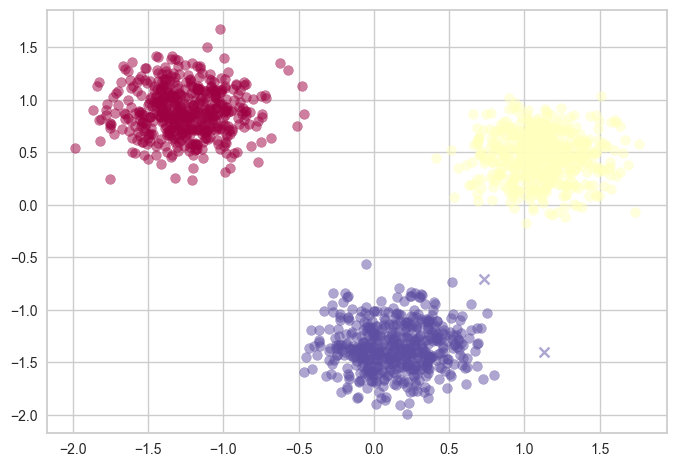

In [52]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'x', alpha=0.5)

# Weather Station Clustering using DBSCAN & scikit-learn

**Dataset:** Environment Canada Monthly Values for July - 2015

![](metadata.png)

In [53]:
import csv
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3        DISCOVERY ISLAND  48.425 -123.226   BC  NaN   NaN  NaN  12.5   0.0   
4     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3  NaN  ...  NaN    NaN  NaN   NaN NaN   NaN  NaN    NaN  NaN  1012475  
4 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  

[5 rows x 25 columns]

In [54]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   
4       ESQUIMALT HARBOUR  48.432 -123.439   BC  8.8   0.0  NaN  13.1   0.0   

    Tn  ...  DwP    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  
0  1.0  ...  0.0    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500  
1 -3.0  ...  0.0  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040  
2 -2.5  ...  9.0    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055  
3 -1.0  ...  2.0    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573  
4  1.9  ...  8.0    NaN  NaN  12.0 NaN   NaN  NaN  258.6  0.0  1012710  

[5 rows x 25 columns]

In [56]:
!pip install -q folium

In [57]:
import folium
import re

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

m = folium.Map(location=[pdf.Lat.mean(), pdf.Long.mean()], zoom_start=9, 
               tiles='Stamen Toner')

for _, row in pdf.iterrows():
    folium.CircleMarker(
        location=[row.Lat, row.Long],
        radius=5,
        popup=re.sub(r'[^a-zA-Z ]+', '', row.Stn_Name),
        color='#1787FE',
        fill=True,
        fill_colour='#1787FE'
    ).add_to(m)

In [58]:
m

In [59]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

Clus_dataSet = pdf[['Long','Lat']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [60]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5}

In [61]:
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
        '#000075', '#808080']*10

In [62]:
def create_map(pdf, cluster_column):
    m = folium.Map(location=[pdf.Lat.mean(), pdf.Long.mean()], zoom_start=9, tiles='Stamen Toner')
    
    for _, row in pdf.iterrows():

        if row[cluster_column] == -1:
            cluster_colour = '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]

        folium.CircleMarker(
            location= [row['Lat'], row['Long']],
            radius=5,
            popup= row[cluster_column],
            color=cluster_colour,
            fill=True,
            fill_color=cluster_colour
        ).add_to(m)
        
    return m

m = create_map(pdf, 'Clus_Db')

m.save('Cluster_DBSCAN.html')

In [63]:
pdf.head()

Stn_Name     Lat     Long Prov   Tm  DwTm    D    Tx  DwTx  \
0               CHEMAINUS  48.935 -123.742   BC  8.2   0.0  NaN  13.5   0.0   
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  7.0   0.0  3.0  15.0   0.0   
2           LAKE COWICHAN  48.829 -124.052   BC  6.8  13.0  2.8  16.0   9.0   
3     DUNCAN KELVIN CREEK  48.735 -123.728   BC  7.7   2.0  3.4  14.5   2.0   
4       ESQUIMALT HARBOUR  48.432 -123.439   BC  8.8   0.0  NaN  13.1   0.0   

    Tn  ...    P%N  S_G    Pd  BS  DwBS  BS%    HDD  CDD   Stn_No  Clus_Db  
0  1.0  ...    NaN  0.0  12.0 NaN   NaN  NaN  273.3  0.0  1011500        0  
1 -3.0  ...  104.0  0.0  12.0 NaN   NaN  NaN  307.0  0.0  1012040        0  
2 -2.5  ...    NaN  NaN  11.0 NaN   NaN  NaN  168.1  0.0  1012055        0  
3 -1.0  ...    NaN  NaN  11.0 NaN   NaN  NaN  267.7  0.0  1012573        0  
4  1.9  ...    NaN  NaN  12.0 NaN   NaN  NaN  258.6  0.0  1012710        0  

[5 rows x 26 columns]

In [64]:
m

In [65]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['Long','Lat','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [66]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [67]:
m = create_map(pdf, 'Clus_Db')

m.save('Cluster_DBSCAN_MV.html')

In [68]:
m